In [1]:
import scipy.io
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import time

dir = "./cifar-10-batches-mat/"
filelist = ["data_batch_1.mat","data_batch_2.mat","data_batch_3.mat","data_batch_4.mat","data_batch_5.mat"]

width = 32
height = 32
color = 3
Nc=10
Ns=50000
N = width*height*color
M=np.zeros((0,N))

for file in filelist:
    
    mat = scipy.io.loadmat(dir+'/'+file)
    M=np.concatenate((M, mat['data']), axis=0)

M=M/255.0 


print(M.shape)


(50000, 3072)


In [2]:
def draw_weights(synapses, Kx, Ky):
    print("draw_weights")
    yy=0

    HM=np.zeros((height*Ky,width*Kx, color))
    for y in range(Ky):
        for x in range(Kx):

            R = synapses[yy,0:1024]
            min_R = np.amin(R)
            if min_R < 0:
                R += abs(min_R)

            max_R = np.amax(R)
            R /= max_R
            R = R.reshape(width,height)

            G = synapses[yy,1024:2048]

            min_G = np.amin(G)
            if min_G < 0:
                G += abs(min_G)

            max_G = np.amax(G)
            G /= max_G
            G = G.reshape(width,height)

            B = synapses[yy,2048:3072]

            min_B = np.amin(B)
            if min_B < 0:
                B += abs(min_B)

            max_B = np.amax(B)
            B /= max_B
            B = B.reshape(width,height)

            HM[y*height:(y+1)*height,x*width:(x+1)*width,0]=R
            HM[y*height:(y+1)*height,x*width:(x+1)*width,1]=G
            HM[y*height:(y+1)*height,x*width:(x+1)*width,2]=B

            yy += 1

    plt.clf()
    nc=np.amax(np.absolute(HM))
    im=plt.imshow(HM)
    fig.colorbar(im,ticks=[np.amin(HM), 0, np.amax(HM)])
    plt.axis('off')
    plt.show()
    fig.canvas.draw() 

In [3]:
eps0=2e-2    # learning rate
Kx=10
Ky=10
hid=Kx*Ky    # number of hidden units that are displayed in Ky by Kx array
mu=0.0
sigma=1.0
Nep=800      # number of epochs
Num=100      # size of the minibatch
prec=1e-30
delta=0.4    # Strength of the anti-hebbian learning
p=2.0        # Lebesgue norm of the weights
k=2          # ranking parameter, must be integer that is bigger or equal than 2

<IPython.core.display.Javascript object>


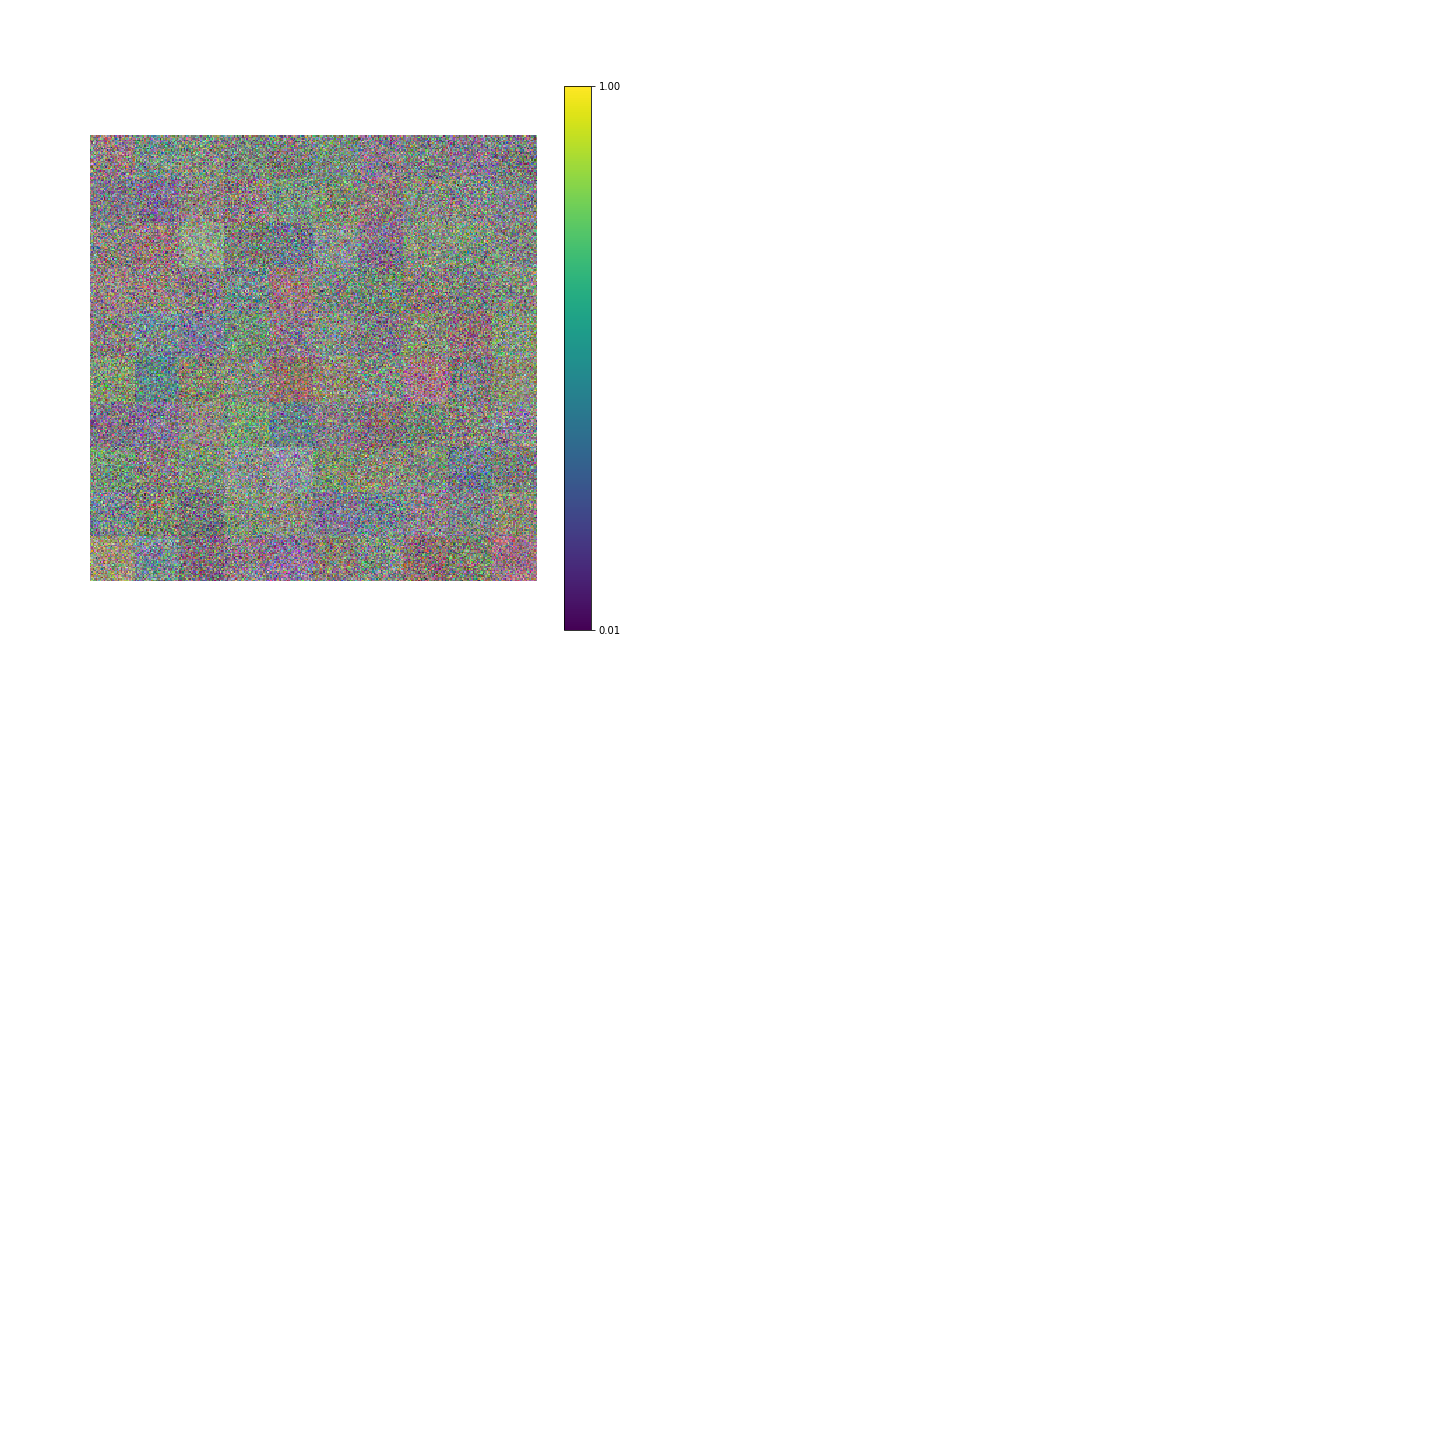

draw_weights
0
end time 8.244908809661865 seconds
draw_weights
1
end time 8.517705917358398 seconds
draw_weights
2
end time 8.889872789382935 seconds
draw_weights
3
end time 8.311509847640991 seconds
draw_weights
4
end time 7.861737966537476 seconds
draw_weights
5
end time 7.592166900634766 seconds
draw_weights
6
end time 8.234893798828125 seconds
draw_weights
7
end time 7.889927864074707 seconds
draw_weights
8
end time 8.710670232772827 seconds
draw_weights
9
end time 8.707688093185425 seconds
draw_weights
10
end time 8.403829097747803 seconds
draw_weights
11
end time 8.184494733810425 seconds
draw_weights
12
end time 8.809324026107788 seconds
draw_weights
13
end time 8.360699892044067 seconds
draw_weights
14
end time 8.59371018409729 seconds
draw_weights
15
end time 7.7375569343566895 seconds
draw_weights
16
end time 8.576359033584595 seconds
draw_weights
17
end time 9.030097961425781 seconds
draw_weights
18
end time 8.71584415435791 seconds
draw_weights
19
end time 9.238551139831543

In [ ]:
%matplotlib inline
%matplotlib notebook
fig=plt.figure(figsize=(10,10))

synapses = np.random.normal(mu, sigma, (hid, N))
#print("synapses\n",synapses.shape)

for nep in range(Nep):
    start_time = time.time()
    eps=eps0*(1-nep/Nep)
    M=M[np.random.permutation(Ns),:]
    for i in range(Ns//Num):
        #if i % 20 == 0:
        #    print(i)
        inputs=np.transpose(M[i*Num:(i+1)*Num,:])
        #print("inputs\n",inputs.shape)
        sig=np.sign(synapses)
        #print("sig\n",sig.shape)
        tot_input=np.dot(sig*np.absolute(synapses)**(p-1),inputs)
        #print("tot_input\n",tot_input.shape)

        y=np.argsort(tot_input,axis=0)
        yl=np.zeros((hid,Num))
        yl[y[hid-1,:],np.arange(Num)]=1.0
        yl[y[hid-k],np.arange(Num)]=-delta
        #print("yl\n",yl.shape)

        xx=np.sum(np.multiply(yl,tot_input),1)
        ds=np.dot(yl,np.transpose(inputs)) - np.multiply(np.tile(xx.reshape(xx.shape[0],1),(1,N)),synapses)
        #print("ds\n",ds.shape)

        nc=np.amax(np.absolute(ds))

        if nc<prec:
            nc=prec
        synapses += eps*np.true_divide(ds,nc)
        #print("synapses\n",synapses.shape)
    draw_weights(synapses, Kx, Ky)
    print(nep)
    print("end time %s seconds" % (time.time() - start_time))

        